# Predicting Disaster Tweets with a Simple LSTM Model
Anthony Lee 2024-11-26

[GitHub archive](https://github.com/anthropikos/kaggle_kernels/blob/40d7c483c8f0d57a5b4708e9a126f428c79cdda6/lstm-tweets.ipynb)

[Kaggle link](https://www.kaggle.com/code/anthonyylee/lstm-tweets)

## Abstract
This notebook documents a simple LSTM model created to predict whether each tweet from a dataset pertains to a disaster. Instead of a bag-of-words approach, the LSTM model retains memory of what it was trained on and thus can learn from the sequences of words. Each tweet is read from a CSV and then tokenized, lemmatized, vectorized using SpaCy's `en_core_web_lg` pipeline and then used to train the LSTM model built in PyTorch. The training is unbatched and CPU based. The model takes approximately 7.5 minutes to train on a quad-core Intel Xeon 2.20Ghz CPU, and was used to inference on a test dataset achieving an F1 score of 0.803. Further, the notebook discusses some of the learnings from the development of the model and presents some suggestions on future improvements.

## Methods
### Train / Validation Split
For overfitting detection, the training dataset was split by 90/10 with 90% of the data being training data and the remaining 10% being held out for validation. The split stratifies based on the training data's target ensuring that the proportion of diaster to non-disaster is equal between the training set and valdiation set.

### NLP Pipeline
SpaCy was used for the text processing step. Using the tools and pretrained model in the `en_core_web_lg` pipeline, each tweet is tokenized, lemmatized, and vectorized for the deep learning model's consumption. The decision to include a lemmatization step is to reduce the domain space of each tweet as words retain similar meanings when reduced to its lemma form. The `en_core_web_lg` pipeline is approximatley 382MB with 685,000 keys and 343,000 unique vectors of 300 dimensions. The output of the pipeline is thus a two dimensional array of N x D where N is the sequence legnth of tweet, and D is the dimension of the token vector (300).

### LSTM Architecture in PyTorch
The LSTM model is constructed using PyTorch and consists of one LSTM layer, one fully-connected (FC) layer, and a sigmoid activation function. The LSTM layer accepts arbitrary sequence of 300 dimension vectors with an output dimension of ten. The FC layer accepts input dimension of ten and outputs a dimension one scalar. Finally, the scalar is passed through a Sigmoid function to map into the probability space indicating the probability of the tweet pertaining to a disaster.

A Mean-Square-Error (MSE) loss was used as the criterion and Adaptive Moment Estimation (Adam) (Kingma & Ba, 2017) is used in the LSTM model.


## Discussion
### CPU vs GPU
To utilize the acceleration provided by a GPU, the data should be batched to allow for parallelized processing of multiple data points (i.e., tweets). Unlike a convolutional model often used in computer vision, the LSTM is sequential model and cannot be meaningfully parallelized for a single data point. I opted out from using the GPU because 1) SpaCy `en_core_web_lg` pipeline is optimized for CPU, 2) copying data between CPU and GPU adds too much overhead for how small this dataset is, and 3) batching the tweets proves to be a challenge.

### Batching vs Unbatching
To utilize GPUs, batching had to be done with the data. However, padding had to be added because of the varying lengths of each tweet. I chose to pad with a vector of zeros which maps to a space character. When padding the dataset with space characters, the model fails to understand the spaces as null and attempts to interpret the spaces resulting in the model parameters being zeroed out during the backpropagation step and constantly inferences to a value of zero thus losses its inferencing power.

### Hyperparameter tuning the learning rate
The Adam optimizer has multiple hyperparameters that can be adjusted and the main one is the learning rate. Without systematic hyperparameter tuning I tested a comically large learning rate of 300 and and small learning rate or 0.001. Due to the lack of batching, the parameters are updated for each data point used for training and thus a large learning rate constantly overshoots the optimal parameter value. Instead, a small learning rate is shown to perform much better and is sufficient enough that signs of overfitting starts showing after one or two epoch(s).

![Train Loss vs Validation Loss](https://www.kaggleusercontent.com/kf/209127182/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..7RGNCq2PeJo-FZ6mmDNNaw.2p09SjEiaYSXXpWWOt3ECZ67mLuL-DN98x-jFIRiNrP8__SvwzHQZuh5P6k5kEYl3xK32WakvgjiA3nf-jGO3HT6n9KINmAxqn5KiMakeAttzyfUWC_w_gY8b968ZL2B6sBrA5wpote0ehGa0p5Kmte0_kPuEY7MVL0fpZ7pZwLoKqXwTX7vjpP-DlLGI3pWWHaxbKhwnIuJAg02BYu-2C04TIERG9i5TBvoYTCyA_gcehPeBc_NjrQIJQA18O_8UQ9oy9DcQwrDq5mrfNQOyDoeGbyxcSMNKLfJU-3T-W_DofiUHFqGAiWoVG1IbyLNAP4hth5PwVN0ilx_T-m_CX2cbbLuTggAvgUwfuYskTojP5KvfMi-asoozN-6zQen61ah29en5Y8OWUL3Jt52fW0h6hs7TINndcZfYx6vxdWf4h49CATELSA_tGiKxM89vsE7ZJ2oNc9Vn__AtkkxIrm4jRZfMEJso9YXcVIBcZBhB8xFxMNnFDhhUCEPYMce3DHgZXUW8eEG-yi4XpGEuVEt5mo1FWsSXbEYVuBqQPicmUX4ZbpjVISapvsQC__5tnYC6kd5j9cSB7R5E_HJ8wx5Yykbkf2ZcBCFnfB19KjAcsfkSourqysIVkNW1kKi.zCL0r__229ksbNBmi7e9sQ/__results___files/__results___7_1.png)

## Conclusion
In conclusion, the LSTM model made parallelization more challenging and considering the overhead introduced when training with GPU, training and inferencing with CPU was the better approach. Even though padding the varying lengths of tweets proves to be challenging, there are options to still be batch train the model such as early halting the training when encountering a token of all zeros. Using the Adam optimizer and a small learning rate, the model is able to achieve F1 score of 0.803 with a training time of aprpoximatly 7.5 minutes. To push the model performance even further, a few suggested improvement is proposed below. However, this simple model shows the value that a model with memory is capable of extracting further information that a simpler model such as bag-of-words is not able to achieve. 

## Future Improvements
- Explore other vectorization methods
    - The pipeline model used is 382MB and takes some time to download/load. For a more portable inteligent device such as a IoT device, the storage requirement could make this model unfeasible. Thus, it would worth looking into utilizing SpaCy's other pretrained pipelines or another encoding method.
- Explore the use of transformers
    - Transformers are shown tremendous progress in the field of NLP and this is a valuable avenue to explore and compare performance with this simple LSTM model. Additionally, various pretrained transformer models have been published and shared freely in an open-source manner. To be able to further train these published model could help fine tune the performance of these published models.
- Explore how to batch train and utilize GPU
    - To be able to batch these varying lengths of tweets have proved challenging and could lead to errors if proper precautions were not considered. One suggested approach is to pad all tweets with a specialized sentinel vector and terminate the LSTM sequential training of each token when the sentinel is encountered.
- Explore how to deploy the trained model in an application that can be used to demo
    - Publish the model using some sort of interactive applet such that the model can be tested with other texts. 
- Improve data cleaning and extraction
    - In this notebook, the NLP processing was essentially offloaded to the SpaCy library and their methodologies. Certain special characters remained in the the tweets and was vectorized accordingly. It would be valuable to create an alternative dataset of which the special characters such as emojis or emoticons were removed and train the LSTM model on these data. Through this comparison we could be able to hypothesize the amount of information informing whether the tweet pertains to a disaster is provided by these non-traditional characters.
- Systematic tune the hyperparamters
    - Use a tool such as RayTune to systematically tune the hyperparameter values and consider the impact of learning rate to the outcome of the model's inference power.
    - Also systematically tune and discover whether additional LSTM layers or LSTM hidden output dimensions could improve the model's performance.
- Permute the order of the training dataset
    - The order of the training dataset is static in this model and because of LSTM's memory, the order of which each training data is introduce could impact the outcome of model's parameters. Permute the order of the dataset and test if the model retains its inference power.
- Test removing lemmatizer
    - Considering that these are tweets thus proper English grammar may be lacking; there may be value in training on non-lemmatized tweets.
- Test training with increased LSTM layers and hidden output dimensions

## References
Kingma, D. P., & Ba, J. (2017). Adam: A Method for Stochastic Optimization (No. arXiv:1412.6980). arXiv. https://doi.org/10.48550/arXiv.1412.6980


## Setting up the environment

In [1]:
# Install the needed langauge package
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 29.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
import gc
from typing import List, Union, Iterable, Tuple, Dict
from multiprocessing import set_start_method, cpu_count
from pathlib import Path
import cProfile, pstats
from collections import namedtuple

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import spacy
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from ray import train, tune
from ray.train import Checkpoint
from ray.tune.schedulers import ASHAScheduler

# TODO: IGNORE - Implement batch training by logging loss every x tweets.
# TODO: DONE - Re-implement the SimpleLSTM interface to define things like layers and hidden outputs
# TODO: DONE - Re-implement the SimpleLSTM interface to remove the first argument of input size and delay the input size into the call dunder.
# TODO: IGNORED (validation process not too expensive so whatever) - Remove validation from training loop and checkpoint
# TODO: DONE - Encapsulate the entire data loading into one pipeline


def read_in_csv(data_dir_path: Union[Path, str] = None) -> Tuple:
    """Read in the dataset CSVs and return a tuple of dataframes."""

    if data_dir_path is None: 
        data_dir_path = f"../input"
        data_dir_path = Path(data_dir_path).resolve().absolute()
    else:
        data_dir_path = Path(data_dir_path).resolve().absolute()

    ## Read in the data
    df_train = pd.read_csv(data_dir_path / Path("nlp-getting-started/train.csv"))
    df_test = pd.read_csv(data_dir_path / Path("nlp-getting-started/test.csv"))
    df_sample_submission = pd.read_csv(data_dir_path / Path("nlp-getting-started/sample_submission.csv"))

    OutputTuple = namedtuple("train_test_example", ["train", "test", "submission_example"])
    return OutputTuple(train=df_train, test=df_test, submission_example=df_sample_submission)


def train_validation_split(df_train: pd.DataFrame, validation_fraction: float = 0.1) -> Tuple:
    """Train/Validation split the train dataframe."""

    ## Simple Train/Validate split
    train_datas, validation_datas, train_targets, validation_targets = train_test_split(
        df_train.text.to_list(),
        df_train.target.to_list(),
        train_size=(1 - validation_fraction),
        random_state=7,  # For consistency
        stratify=df_train.target.to_list(),
    )

    OutputTuple = namedtuple(
        "train_validation_split",
        ["train_datas", "validation_datas", "train_targets", "validation_targets"],
    )
    return OutputTuple(
        train_datas=train_datas,
        validation_datas=validation_datas,
        train_targets=train_targets,
        validation_targets=validation_targets,
    )


def text_to_vector(documents: Iterable, n_process=None) -> List:
    """Iterate through a list of documents and returns a list of vectorized documents.

    Uses spaCy's en_core_web_log model to transform each tweet into a 2D ndarray
    of floats. Each ndarray is the word_count by 300 where 300 is the vector length
    of each token used in the spaCy model.
    """
    if not isinstance(documents, Iterable):
        raise TypeError("`documents` has to be a list of strings.")

    nlp = spacy.load("en_core_web_lg")

    vec_length = 300  # Token vector length in SpaCy

    if n_process is None:
        n_process = cpu_count()

    docs = nlp.pipe(texts=documents, n_process=n_process, batch_size=50)

    holder_all_tweets = []

    for doc in docs:
        tweet_length = len(doc)
        doc_ndarray = np.zeros(shape=(tweet_length, vec_length), dtype=np.float64)

        for idx, token in enumerate(doc):
            doc_ndarray[idx, :] = token.vector
        holder_all_tweets.append(doc_ndarray)

    return holder_all_tweets


class DisasterTweetDataset(Dataset):
    def __init__(self, vectorized_tweets: Iterable, targets: Iterable) -> None:
        self.vectorized_tweets = vectorized_tweets
        self.targets = targets

        self.__data_validation()

    def __len__(self) -> int:
        return len(self.targets)

    def __getitem__(self, idx: int) -> Tuple[List, List]:
        ReturnedResult = namedtuple("disaster_tweet", ["target", "vectorized_tweet"])

        target = self.targets[idx]
        vectorized_tweet = self.vectorized_tweets[idx]

        return ReturnedResult(target=target, vectorized_tweet=vectorized_tweet)

    def __data_validation(self) -> None:
        if len(self.vectorized_tweets) != len(self.targets):
            raise ValueError(f"The data counts do NOT match, got {len(self.vectorized_tweets)} and {len(self.targets)}")


def load_dataset(mode:str="all", data_directory:Union[str, Path]=None) -> tuple:
    """Data processing pipeline and return dataset objects for both train and validation sets."""
    
    if data_directory is not None:
        data_directory = Path(data_directory)

    # Read in the text files
    dfs = read_in_csv(data_dir_path=data_directory)
    df_train = dfs.train
    train_data, validation_data, train_target, validation_target = train_validation_split(
        df_train=df_train, validation_fraction=0.2
    )

    # Tokenize and encode / vectorize
    train_data = text_to_vector(train_data)
    validation_data = text_to_vector(validation_data)

    # Create dataset objects
    train_dataset = DisasterTweetDataset(train_data, train_target)
    validation_dataset = DisasterTweetDataset(validation_data, validation_target)

    DatasetOutput = namedtuple("train_validation_datasets", ["train_dataset", "validation_dataset"])
    return DatasetOutput(train_dataset=train_dataset, validation_dataset=validation_dataset)


def checkpoint_save(model, optimizer, epoch, training_loss, validation_loss, dir_path=None) -> Path:

    filename = f"checkpoint_epoch_{epoch}.checkpoint"
    file_path = dir_path / Path(filename)

    if dir_path is None:
        dir_path = Path.cwd()
    else:
        dir_path = Path(dir_path)

    dict_to_save = {
        "epoch": epoch,
        "training_loss": training_loss,
        "validation_loss": validation_loss,
        "model_class": model.__class__,
        "model_state_dict": model.state_dict(),
        "optimizer_class": optimizer.__class__,
        "optimizer_state_dict": optimizer.state_dict(),
    }

    torch.save(dict_to_save, file_path)

    return file_path


def checkpoint_load(file_path) -> tuple:
    file_path = Path(file_path)
    checkpoint = torch.load(file_path, weights_only=False)

    return checkpoint


def checkpoint_load_into_objects(checkpoint) -> tuple:
    """Use the provided checkpoint to return stateful model and optimizer instances."""

    # Checkpoint structure check
    for key_name in [
        "model_class",
        "optimizer_class",
        "training_loss",
        "validation_loss",
    ]:
        if key_name not in checkpoint.keys():
            raise KeyError(f"The checkpoint is incorrect, {key_name} is missing")

    # Create and load model state dict
    model = checkpoint["model_class"]()  # Instantiate using the class name
    model.load_state_dict(checkpoint["model_state_dict"])

    # Create and load optimizer state dict
    optimizer = checkpoint["optimizer_class"](model.parameters())  # Instantiate using the class name
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

    # Load loss information
    training_loss = checkpoint["training_loss"]
    validation_loss = checkpoint["validation_loss"]

    CheckpointResult = namedtuple("checkpoint", ["model", "optimizer", "training_loss", "validation_loss"])

    return CheckpointResult(
        model=model,
        optimizer=optimizer,
        training_loss=training_loss,
        validation_loss=validation_loss,
    )


def plot_train_validation_loss(avg_training_loss: np.ndarray, avg_validation_loss: np.ndarray) -> mpl.axes.Axes:
    assert len(avg_training_loss) == len(
        avg_validation_loss
    ), f"Training loss and validation loss arrays should have the same length, got {len(avg_training_loss)} and {len(avg_validation_loss)}"

    fig, ax = plt.subplots()
    marker_size = 10

    ax.set_title("Avg training and validation loss for each epoch")
    ax.set_ylabel("Avg [training | validation] loss")
    ax.set_xlabel("Epoch")

    num_of_epochs = len(avg_training_loss)

    ax.scatter(
        range(num_of_epochs),
        avg_training_loss,
        color="C1",
        s=marker_size,
        label="avg training loss",
    )
    ax.scatter(
        range(num_of_epochs),
        avg_validation_loss,
        color="C2",
        s=marker_size,
        label="avg validation loss",
    )

    ax.plot(avg_training_loss, "--", alpha=0.3, color="C1")
    ax.plot(avg_validation_loss, "--", alpha=0.3, color="C2")

    ax.legend(loc="upper right")
    ax.grid(visible=True, which="both", axis="both", alpha=0.2)
    return ax


def predict_test_data_for_submission(model: torch.nn.Module, df_test: pd.DataFrame, save: bool = None) -> List:
    """Convenience function to predict for submission."""
    if save is None:
        save = False

    test_datas_vectorized = text_to_vector(df_test.text.to_list())

    model.train(False)
    holder = []

    for item in test_datas_vectorized:
        prediction = model(torch.tensor(item)).detach()

        # Convert probability to categorical label
        if prediction > 0.5:
            prediction = 1
        else:
            prediction = 0

        holder.append(prediction)

    if save is True:
        submission = pd.DataFrame({"id": df_test.id, "target": holder})
        submission.to_csv("/kaggle/working/submission.csv", index=False)

    return holder


class SimpleLSTM(torch.nn.Module):

    def __init__(
        self,
        config: dict,
    ) -> None:
        """Simple LSTM model.

        Structure:
            LSTM-Layer(s) > Dense-Layer > Sigmoid activation function

        - Unable to to train in batches as each tweet (or document) has varied length.
        - Batch normalization is not really needed because outputs have a sigmoid activation function.
        """
        super().__init__()

        # Variables
        self.config = config
        self.target_output_size = 1
        self.dtype = torch.float64

        # Fully connected layer
        self.layer_linear = torch.nn.Linear(
            in_features=self.config["lstm_hiddenSize"],
            out_features=self.target_output_size,
            bias=config["linear_bias"],
            dtype=self.dtype,
        )

        # Final sigmoid layer
        self.layer_sigmoid = torch.nn.Sigmoid()  # transforms to probability space
        self.to(dtype=self.dtype)  # self.double() also works

        return

    def forward(self, input_data: torch.Tensor) -> torch.Tensor:
        """Forward calculation, call the module instance instead.

        Even though this method is defined, one should call the module instance instead to make
        sure that all the registered hooks are taken care of.
        Source: https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward
        """
        # Instantiate input layer
        if input_data.dim > 1:
            raise AttributeError(f"Input data expected to have 1-dimension, got {input_data.dim}-dimension(s).")
        self.input_size = input_data.shape()[0]

        self.layer_lstm = torch.nn.LSTM(
            input_size=self.input_size,
            hidden_size=self.config["lstm_hiddenSize"],
            num_layers=self.config["lstm_numLayers"],
            bias=self.config["lstm_bias"],
            batch_first=True,  # Batch first is more nature, but hidden and cell state outputs are not batch first (see PyTorch documentation)
            dropout=self.config["lstm_dropoutProbability"],
            bidirectional=self.config["lstm_bidirectional"],
            dtype=self.dtype,
        )

        # LSTM layer
        # - last_layer_output: the last layer output for each sequence of the input sequence (tokens of a sentence)
        # - Output vs h_n: The former only has output for the last LSTM layer, whereas the latter has output for all LSTM layers.
        last_layer_output, (h_n, c_n) = self.layer_lstm(input_data)
        if last_layer_output.dim() == 3:
            last_layer_output = last_layer_output[:, -1, :]  # All batches; Last sequence output; hidden size
        elif last_layer_output.dim() == 2:
            last_layer_output = last_layer_output[-1, :]  # When no batches - Last seq output; hidden size
        else:
            raise ValueError(
                f"Output of LSTM layer expected to be either 3 or 2 dimensions (got {last_layer_output.dim()} dimensions.)"
            )

        # Dense fully connected layer
        output = torch.squeeze(last_layer_output)
        output = self.layer_linear(output)

        # Sigmoid activation function
        output = self.layer_sigmoid(output)

        return output


def validation_loss(
    model: torch.nn.Module,
    criterion: torch.nn.modules.loss._Loss,
    validation_dataset: torch.utils.data.Dataset,
):
    """Calculate validation loss and return last loss and running loss of the model."""

    BatchedValidationLoss = namedtuple("batched_validation_loss", ["last_loss", "running_loss"])

    last_validation_loss = 0
    running_validation_loss = 0

    model.train(False)  # Eval mode

    with torch.no_grad():
        for idx_data, (validation_target, validation_data) in enumerate(validation_dataset):

            # Inference
            prediction = model(torch.tensor(validation_data))

            # Calculate loss
            loss = criterion(prediction, torch.tensor(validation_target).double())

            # Keep track of the loss
            last_validation_loss = loss.detach()  # Solves memory leak - Or use loss.item()
            running_validation_loss += last_validation_loss

    return BatchedValidationLoss(last_loss=last_validation_loss, running_loss=running_validation_loss)


def train_SimpleLSTM(
    model: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    criterion: torch.nn.modules.loss._Loss,
    train_dataset: torch.utils.data.Dataset,
):
    """Model training function, and returns the last loss and running loss as a tuple."""

    last_train_loss = 0
    running_train_loss = 0

    model.train(True)  # Training mode

    # Training loop
    for idx_data, (train_target, train_data) in enumerate(
        tqdm(train_dataset, desc="    Training...", unit="Tweet", miniters=100)
    ):
        # if idx_batch == 5: break  # DEBUG

        # Forward prop
        model.zero_grad()  # Zero out the graident
        optimizer.zero_grad()
        prediction = model(torch.tensor(train_data))

        # Calculate loss
        loss = criterion(prediction, torch.tensor(train_target).double())

        # Backward prop
        loss.backward()  # Calculate gradients after the loss is aggregated with the reduction strategy
        optimizer.step()  # Update parameter with gradients

        # Keep track of loss
        last_train_loss = loss.detach()  # Solves memory leak - Or loss.item()
        running_train_loss += last_train_loss

    BatchedTrainLoss = namedtuple("batched_train_loss", ["last_loss", "running_loss"])
    return BatchedTrainLoss(last_loss=last_train_loss, running_loss=running_train_loss)


def train_SimpleLSTM_ray(
    config: dict,
):

    model = SimpleLSTM(config)
    optimizer = torch.optim.Adam(model.parameters(), lr=config["adam_learningRate"])
    criterion = torch.nn.MSELoss(reduction="none")

    train_dataset, validation_dataset = load_dataset(data_directory=config["data_directory"])

    model.train(True)  # Training mode

    # Training Loop
    for idx_epoch in range(config["n_epochs"]):
        # Reset for each epoch
        last_train_loss = 0
        running_train_loss = 0

        for idx_data, (train_target, train_data) in enumerate(
            tqdm(
                train_dataset,
                desc=f"    Training...; running_train_loss={round(running_train_loss, 3)}",
                unit="Tweet(s)",
                miniters=100,
            )
        ):
            # Forward prop
            model.zero_grad()  # Zero out the graident
            optimizer.zero_grad()
            prediction = model(torch.tensor(train_data))

            # Calculate loss
            loss = criterion(prediction, torch.tensor(train_target).double())

            # Backward prop
            loss.backward()  # Calculate gradients after the loss is aggregated with the reduction strategy
            optimizer.step()  # Update parameter with gradients

            # Keep track of loss
            last_train_loss = loss.detach()  # Solves memory leak - Or loss.item()
            running_train_loss += last_train_loss

        # Calculate validation loss
        validation_loss_tuple = validation_loss(
            model=model,
            criterion=torch.nn.MSELoss,
            validation_dataset=validation_dataset,
        )
        running_validation_loss = validation_loss_tuple.running_loss

        # Save checkpoint
        checkpoint_path = checkpoint_save(
            model=model,
            optimizer=optimizer,
            epoch=idx_epoch,
            training_loss=running_train_loss,
            validation_loss=running_validation_loss,
        )

        # Send results to Ray
        checkpoint = Checkpoint.from_directory(checkpoint_path)
        train.report({"loss": running_train_loss}, checkpoint=checkpoint)  # Send report to Ray

    return


## Data Processing
The data are read in from CSV, train-validation splitted, vectorized, and then wrapped as PyTorch Datasets.

In [3]:
## Data Processing Steps ##

# (1) Read in the CSVs
# df_train, df_test, df_sample_submission = read_in_csv()  # Running interactively on Kaggle
df_train, df_test, df_sample_submission = read_in_csv("../input/")  # Running locally - dataset is pulled locally

# (2) Train / Validation split
train_datas, validation_datas, train_targets, validation_targets = train_validation_split(
    df_train=df_train, validation_fraction=0.1,
)

# (3) Vectorize the text datas so can be processed by the model
train_datas_vectorized = text_to_vector(train_datas)
validation_datas_vectorized = text_to_vector(validation_datas)
test_datas_vectorized = text_to_vector(df_test.text.to_list())

# (4) Turn them into dataset for convenience
disaster_tweet_dataset = DisasterTweetDataset(train_datas_vectorized, train_targets)
disaster_tweet_dataset_validation = DisasterTweetDataset(validation_datas_vectorized, validation_targets)

## Understanding the Training dataset
The training dataset includes id, keyword, location, text, and target information. However, the keyword and location columns are sparsely populated and contains a lot of characters encoded in some other encoding methods that do not seem to contain valuable information for what we are seeking here.

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


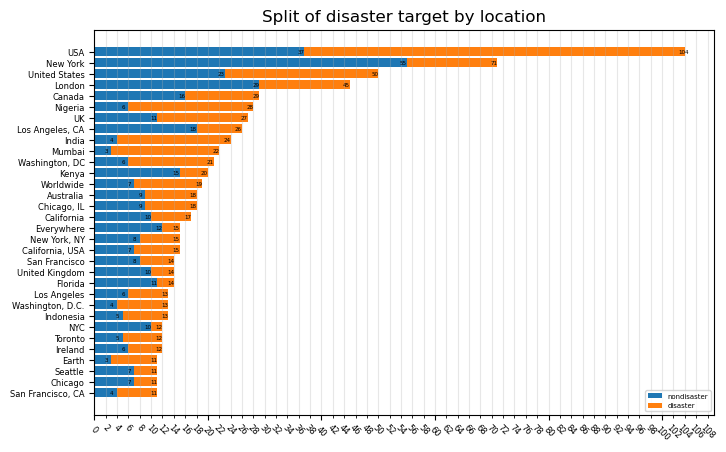

In [5]:
from matplotlib import ticker

## Pivot table for location and target
columnname_map = {0: "nondisaster", 1: "disaster"}
temp = df_train.pivot_table(
    values="id",
    columns="target",
    index="location",
    aggfunc="count",
    dropna=False,
    fill_value=0,
    margins=True,
)
temp = temp.rename(columns=columnname_map)
temp = temp.drop(labels="All", axis=0)
temp = temp.sort_values(by="All", ascending=False)

mask = temp.All > 10
temp = temp.loc[mask, :].sort_values(by="All", ascending=True)

## Construct stacked bar chart
stacked_barchart_data = {}
for idx, (key, value) in enumerate(columnname_map.items()):
    stacked_barchart_data[value] = temp.loc[:, value].to_list()
    if idx == 0:
        left = np.zeros(len(stacked_barchart_data[value]))  # Construct the base bar of the stacked barchart


fig, ax = plt.subplots(figsize=(8, 5))
for label, data in stacked_barchart_data.items():
    ax.barh(y=temp.index.to_list(), width=data, label=label, left=left)
    left += data

ax.legend(fontsize=5, loc="lower right")
ax.set_title("Split of disaster target by location")
ax.grid(visible=True, which="both", axis="x", alpha=0.3)
ax.get_xaxis().set_minor_locator(ticker.MultipleLocator(base=2))
ax.get_xaxis().set_minor_formatter(ticker.ScalarFormatter())
ax.tick_params(axis="both", which="both", labelsize=6)
ax.tick_params(axis="x", which="both", rotation=-45)

# Add artists
_ = ax.bar_label(ax.containers[0], fmt="%d", fontsize=4, padding=-5)  # Returns a list of annotations
_ = ax.bar_label(ax.containers[1], fmt="%d", fontsize=4, padding=-5)

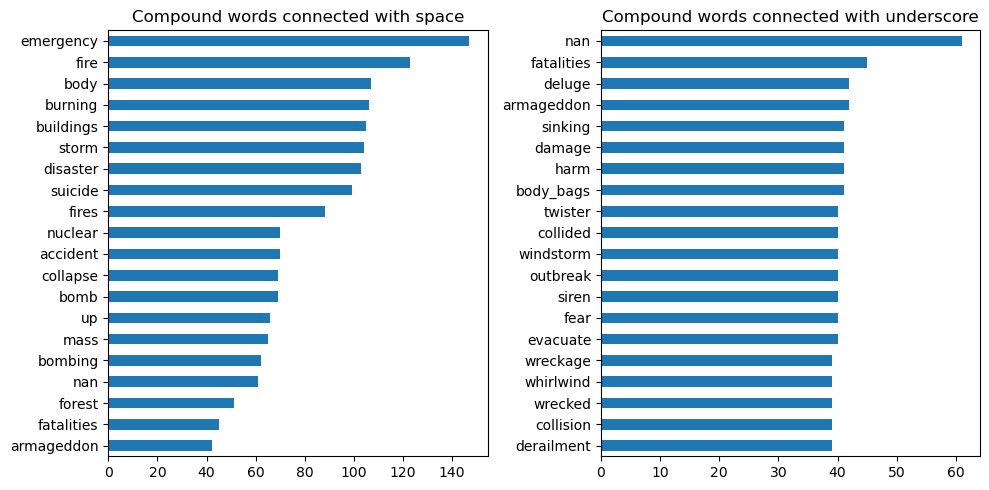

In [6]:
# Are there more than one keyword?
def replace_nan_with_str(value):
    if isinstance(value, float):
        if np.isnan(value):
            return "nan"
    elif isinstance(value, str):
        return value


word_list = df_train.keyword.to_list()
word_list = [replace_nan_with_str(word) for word in word_list]
compound_word_with_space = " ".join([word.replace("%20", " ") for word in word_list])
compound_word_with_underscore = " ".join([word.replace("%20", "_") for word in word_list])


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
temp = pd.Series(compound_word_with_space.split(" ")).value_counts().sort_values(ascending=False)
temp = temp.head(20).sort_values(ascending=True)
temp.plot(ax=ax, kind="barh")
ax.set_title("Compound words connected with space")

ax = axs[1]
temp = pd.Series(compound_word_with_underscore.split(" ")).value_counts().sort_values(ascending=False)
temp = temp.head(20).sort_values(ascending=True)
temp.plot(ax=ax, kind="barh")
ax.set_title("Compound words connected with underscore")


fig.tight_layout()
fig.show()

## EDA - Sort by ratio of "disaster count" to "non-disaster count"
Not all the tweets have keywords, so here I am just looking at the set of tweets that have keywords and sort by the ratio of number of disaster tweets to non-disaster tweet for each keyword. The idea is to find the correlation between a keyword and disaster thus the larger the raio the more that specific keyword is associated to some disaster.

To resolve the issue where there are possible zeros in the denominator, I added one to both the numerator and denominator such that zero-division won't happen. This adjustment is imprecise, however it preserves most of the rank and since the comparison is only on the rank of the ratio, this is an acceptable estimation.

### Ratio > 0.5
In this case, more than half the tweets with a specific keyword is associated with a disaster.
Looking at the top 20 keywords, it is not exactly clear what the definition of disaster is. Whether is by the casualty count or by the monetary cost of an event. For example: the following cases that prompted some questions: 
- derailment:
    - Technically the ratio should be not-defined, however, for convenience and the purpose of our analysis, we can consider it as an infinity sentinel. 
    - Derailment typically results in large number of casualties if it is a passenger train. However, passenger trains are less likely in the US compared to countries with robust train transportation systems such as EU, India, Japan. 
    - In the case of freigh train derailment, large monetary cost could be accurred if the cargo are valuable or the cargo are toxic chemical thus results in horrible environmental damages. 
- forest fires / wild fires:
    - Wild fires usually have low casualties as they occur in remote regions, however its impact are wide ranging and last couple generations. 
    - In such case, is such generational cost the qualifier of it being a disaster? Or, is casulaties estimated from the deaths occurred over the years due to the negative impact of lost forests?

### Ratio < 0.5 (first 20)


### Ratio < 0.5 (last 20)
For keywords with more non-disaster than disasters

### Conclusion from this section
The definition of disaster is not cut-and-dry and the critic in me believe that disaster in such case may be whatever is more news worthy and results in large enough eyeballs count.

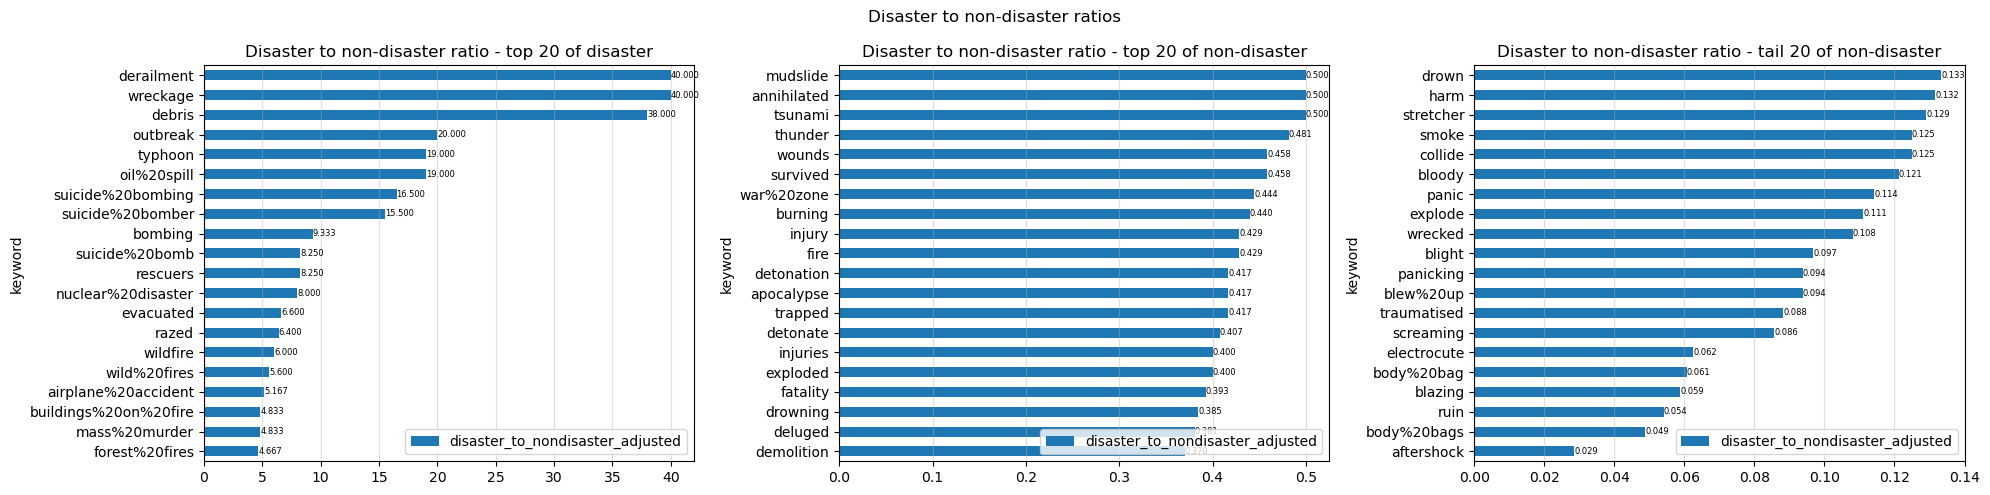

In [7]:
## Pivot keyword vs target
# NOTE: Numerator and denominator both plus 1 adjustment - Mostly preserves the rank of ratio
temp = df_train.pivot_table(
    values="id",
    columns="target",
    index="keyword",
    aggfunc="count",
    dropna=False,
    fill_value=0,
)
temp = temp.rename(columns={0: "nondisaster", 1: "disaster"})
temp.columns.name = None  # Remove the column name because it is confusing
temp = temp.reset_index()
temp["disaster_to_nondisaster"] = temp.loc[:, "disaster"] / temp.loc[:, "nondisaster"]
temp["disaster_to_nondisaster_adjusted"] = (temp.loc[:, "disaster"] + 1) / (
    temp.loc[:, "nondisaster"] + 1
)  # Plus one so to not divide by zero
temp = temp.sort_values(by="disaster_to_nondisaster_adjusted", ascending=False)

# Filter
mask = temp["disaster_to_nondisaster_adjusted"] > 0.5
more_disaster = temp.loc[mask, :]
more_nondisaster = temp.loc[~mask, :]

# Figure for plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

#### Show the top 20 disaster keywords
top_20_disaster_keywords = more_disaster.head(20)
ax = axs[0]

(
    top_20_disaster_keywords.sort_values(by="disaster_to_nondisaster_adjusted", ascending=True).plot(
        ax=ax, kind="barh", x="keyword", y="disaster_to_nondisaster_adjusted"
    )
)

# Add artists
ax.set_title("Disaster to non-disaster ratio - top 20 of disaster")
ax.grid(visible=True, which="major", axis="x", alpha=0.4)
_ = ax.bar_label(ax.containers[0], fmt="%.3f", fontsize=6)
ax.legend(loc="lower right")


#### Show the first 20 of the non-disaster keywords
top_20_nondisaster_keywords = more_nondisaster.head(20)
ax = axs[1]

(
    top_20_nondisaster_keywords.sort_values(by="disaster_to_nondisaster_adjusted", ascending=True).plot(
        ax=ax, kind="barh", x="keyword", y="disaster_to_nondisaster_adjusted"
    )
)

# Add artists
ax.set_title("Disaster to non-disaster ratio - top 20 of non-disaster")
ax.grid(visible=True, which="major", axis="x", alpha=0.4)
_ = ax.bar_label(ax.containers[0], fmt="%.3f", fontsize=6)
ax.legend(loc="lower right")


#### Show the tail 20 of the non-disaster keywords
tail_20_nondisaster_keywords = more_nondisaster.tail(20)
ax = axs[2]

(
    tail_20_nondisaster_keywords.sort_values(by="disaster_to_nondisaster_adjusted", ascending=True).plot(
        ax=ax, kind="barh", x="keyword", y="disaster_to_nondisaster_adjusted"
    )
)

# Add artists
ax.set_title("Disaster to non-disaster ratio - tail 20 of non-disaster")
ax.grid(visible=True, which="major", axis="x", alpha=0.4)
_ = ax.bar_label(ax.containers[0], fmt="%.3f", fontsize=6)
ax.legend(loc="lower right")

fig.suptitle("Disaster to non-disaster ratios")
fig.tight_layout()

## Dataset distribution
There are more non-disaster tweets in this dataset than disaster ones, hence the importance of stratifying the two targets (disaster and non-disaster) when splitting them into the train/validation sets.

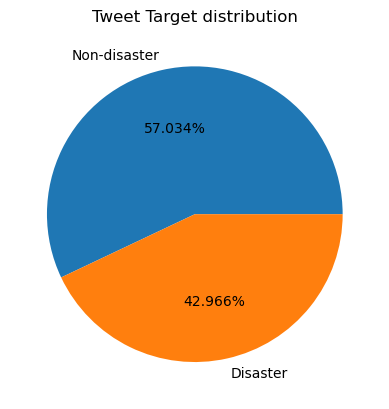

In [8]:
## Plotting target balance - disaster vs non-disaster
def pie_chart_label(pct, all_data):
    output = pct / 100 * np.sum(all_data)
    return f"{output}"


fig, ax = plt.subplots()
target_label_mapping = {0: "Non-disaster", 1: "Disaster"}
series_target_counts = df_train.target.value_counts()

ax.pie(
    x=series_target_counts.values,
    labels=list(map(lambda label: target_label_mapping[label], series_target_counts.index.values)),
    autopct=lambda pct: f"{round(pct, 3)}%",
)

ax.set_title("Tweet Target distribution")
plt.show(fig)

## Train the Model
Below we train the model with the parameter set to 10 epochs and a learning rate of 0.001.

In [9]:
config = {
    "lstm_hiddenSize": tune.choice([10, 20, 30, 40, 50]), 
    "linear_bias": tune.choice([True, False]),
    "lstm_numLayers": tune.choice([1, 3, 5, 7, 9]),
    "lstm_bias": tune.choice([True, False]),
    "lstm_dropoutProbability": tune.choice([0, 0.2, 0.4, 0.6]), 
    "lstm_bidirectional": tune.choice([True, False]), 
    "adam_learningRate": tune.choice([0.001 ,0.01, 0.1]),
    "data_directory": Path("../input/").resolve().absolute()
}

config["data_directory"]

PosixPath('/home/anthony/github/kaggle_kernels/input')

In [10]:
config = {
    "lstm_hiddenSize": tune.choice([10, 20, 30, 40, 50]), 
    "linear_bias": tune.choice([True, False]),
    "lstm_numLayers": tune.choice([1, 3, 5, 7, 9]),
    "lstm_bias": tune.choice([True, False]),
    "lstm_dropoutProbability": tune.choice([0, 0.2, 0.4, 0.6]), 
    "lstm_bidirectional": False,
    "adam_learningRate": tune.choice([0.001 ,0.01, 0.1]),
    "data_directory": Path("../input/").resolve().absolute()
}

scheduler = ASHAScheduler(
    max_t=10,
    grace_period=1,
    reduction_factor=2
)

tuner = tune.Tuner(
    tune.with_resources(
        tune.with_parameters(train_SimpleLSTM_ray),
        resources={"cpu": 1}
    ),
    tune_config=tune.TuneConfig(
        metric="loss", 
        mode="min", 
        scheduler=scheduler, 
        num_samples=10,
    ),
    param_space=config
)

result = tuner.fit()

2024-12-09 21:38:29,432	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [ ]:
## Training the model!


def training_loop(num_of_epochs: int = None, learning_rate: float = None):
    # Some parameters
    if num_of_epochs is None:
        num_of_epochs = 5
    if learning_rate is None:
        learning_rate = 0.001

    # Instantiating the model, optimizer, and criterion
    lstm = SimpleLSTM()
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    criterion = torch.nn.MSELoss(reduction="none")  # Non-batched, thus don't need reduction strategy

    holder_avg_train_loss = np.zeros(shape=num_of_epochs, dtype=np.float64)
    holder_avg_validation_loss = np.zeros(shape=num_of_epochs, dtype=np.float64)

    # Epoch training loop
    for idx_epoch in tqdm(range(num_of_epochs), desc="Training epoch...", unit="Epoch"):
        train_result = train_SimpleLSTM(lstm, optimizer, criterion, disaster_tweet_dataset)
        validation_result = validation_loss(lstm, criterion, disaster_tweet_dataset_validation)

        # Calculate avg train loss and validation loss for this epoch
        running_train_loss = train_result.running_loss
        running_validation_loss = validation_result.running_loss

        avg_train_loss = running_train_loss / len(disaster_tweet_dataset)
        avg_validation_loss = running_validation_loss / len(disaster_tweet_dataset_validation)

        # Add to holder
        holder_avg_train_loss[idx_epoch] = avg_train_loss
        holder_avg_validation_loss[idx_epoch] = avg_validation_loss

        # Checkpoint save
        checkpoint_save(
            lstm,
            optimizer,
            epoch=idx_epoch,
            training_loss=avg_train_loss,
            validation_loss=avg_validation_loss,
        )

    result_tuple = namedtuple("training_loop_results", ["avg_train_loss", "avg_validation_loss"])
    return result_tuple(
        avg_train_loss=holder_avg_train_loss,
        avg_validation_loss=holder_avg_validation_loss,
    )


# Train the model
result = training_loop(num_of_epochs=5, learning_rate=0.001)

# Plot results
ax = plot_train_validation_loss(result.holder_avg_train_loss, result.holder_avg_validation_loss)
fig = ax.get_figure()
fig.savefig("/kaggle/working/avg_train_validation_loss_trend.svg")
plt.show()

## Load model snapshot and inference test dataset for competition

In [ ]:
# Submit to competition
checkpoint = checkpoint_load(
    "/kaggle/working/checkpoint_epoch_3.checkpoint"
)  # Because after the 3rd epoch, shows overfitting
lstm = checkpoint.model
prediction = predict_test_data_for_submission(model=lstm, df_test=df_test, save=True)

## Having fun with Transformers

In [2]:
# from torchtext.transforms import BERTTokenizer
from torchtext.transforms import BERTTokenizer

VOCAB_FILE = "https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt"

tokenizer = BERTTokenizer(VOCAB_FILE, do_lower_case=True, return_tokens=True)
tokenizer("Hellow world how are you, #HappyDay!")

ModuleNotFoundError: No module named 'torchtext.transforms'

In [20]:
from transformers import BertTokenizerFast
from pprint import pprint

tokenizer = BertTokenizerFast.from_pretrained("themeetjani/tweet-classification")


tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [35]:
tokenizer("a A b B c B", padding=False, return_tensors="pt")

{'input_ids': tensor([[101, 169, 138, 170, 139, 171, 139, 102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [1]:
import torch
from transformers import AutoTokenizer, DistilBertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
inputs = tokenizer("chemical spill in boulder", return_tensors="pt")

with torch.no_grad():
    logits = model(inputs["input_ids"]).logits

print(torch.sum(torch.sigmoid(logits)))

tensor(0.9376)


In [10]:
# from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
# from transformers import AutoTokenizer
# import numpy as np
# from scipy.special import expit

    
# MODEL = f"cardiffnlp/tweet-topic-latest-multi"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)

# # PT
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# class_mapping = model.config.id2label

# text = "It is great to see athletes promoting awareness for climate change."
# tokens = tokenizer(text, return_tensors='pt')


# output = model(**tokens)

# scores = output[0][0].detach().numpy()
# scores = expit(scores)
# predictions = (scores >= 0.5) * 1

# predictions

# for i in range(len(predictions)):
#     if predictions[i]: 
#         print(i, class_mapping[i])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [14]:
# from transformers import PreTrainedModel, AutoConfig, AutoModel, AutoModelForSequenceClassification
# from torch import nn
# from scipy.special import expit

# class CustomModelTest(nn.Module):
#     # https://huggingface.co/cardiffnlp/tweet-topic-latest-multi/blob/main/README.md
#     # https://discuss.huggingface.co/t/adding-linear-layer-to-transformer-model-save-pretrained-and-load-pretrained/15548/2
#     def __init__(self):
#         super().__init__()

#         self.MODEL = f"cardiffnlp/tweet-topic-latest-multi"

#         self.tokenizer = AutoTokenizer.from_pretrained(self.MODEL)
#         self.base = AutoModelForSequenceClassification.from_pretrained(self.MODEL)

#     def forward(self, string_to_process):
#         tokens = self.tokenizer(string_to_process, return_tensors="pt")

#         output = self.base(**tokens)
#         scores = output[0][0].detach().numpy()
#         scores = expit(scores)
#         predictions = (scores >= 0.5) * 1
#         return predictions
    
# # config = AutoConfig.from_pretrained("cardiffnlp/tweet-topic-latest-multi")
# custom_model = CustomModelTest()

# text = "It is great to see athletes promoting awareness for climate change."
# output_custom = custom_model(text)
# print(output_custom)

# predictions = output_custom
# for i in range(len(predictions)):
#     if predictions[i]: 
#         print(i, class_mapping[i])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
7 fitness_&_health
12 news_&_social_concern
16 sports
